In [1]:
#Importing Libraries

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from scipy import stats
from wordcloud import WordCloud,STOPWORDS 
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import warnings; warnings.simplefilter('ignore')

In [3]:
#Loading Data

In [4]:
input_data = pd. read_csv('movies_metadata.csv')
input_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
input_data.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [6]:
#Testing and understanding the dataset

In [7]:
input_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [8]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [9]:
#Analysing data and building a wordCloud

In [10]:
input_data['title'] = input_data['title'].astype('str')
input_data['overview'] = input_data['overview'].astype('str')

In [11]:
movie_title = ' '.join(input_data['title'])

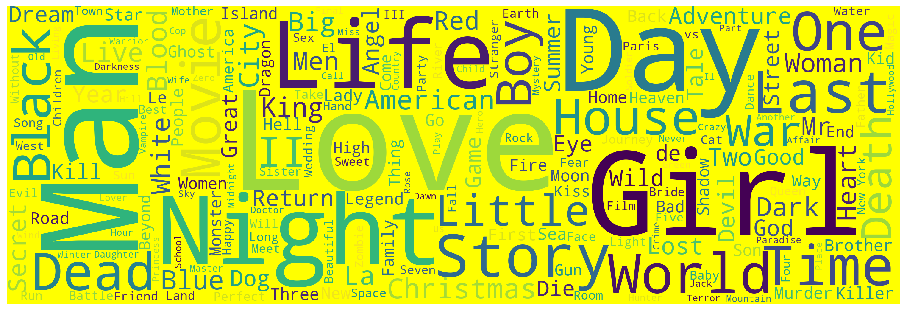

In [12]:
movieTitleWC = WordCloud(stopwords=STOPWORDS, background_color='Yellow', height=1000, width=3000).generate(movie_title)
plt.figure(figsize=(16,8))
plt.imshow(movieTitleWC)
plt.axis('off')
plt.show()

In [13]:
#Implementation of Simple Recommendation System 

In [14]:
input_data['genres'] = input_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [15]:
no_of_votes = input_data[input_data['vote_count'].notnull()]['vote_count'].astype('int')
avgVotes = input_data[input_data['vote_average'].notnull()]['vote_average'].astype('int')
meanVotes = avgVotes.mean()
meanVotes

5.244896612406511

In [16]:
minVotes = no_of_votes.quantile(0.95)
minVotes

434.0

In [17]:
input_data['year'] = pd.to_datetime(input_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [18]:
movies_qualified = input_data[(input_data['vote_count'] >= minVotes) & (input_data['vote_count'].notnull()) & (input_data['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
movies_qualified['vote_count'] = movies_qualified['vote_count'].astype('int')
movies_qualified['vote_average'] = movies_qualified['vote_average'].astype('int')
movies_qualified.shape

(2274, 6)

In [19]:
def weighted_rating(a):
    noOfVotes = a['vote_count']
    avgRating = a['vote_average']
    return (noOfVotes/(noOfVotes+minVotes) * avgRating) + (minVotes/(minVotes+noOfVotes) * meanVotes)

In [20]:
movies_qualified['wr'] = movies_qualified.apply(weighted_rating, axis=1)

In [21]:
movies_qualified = movies_qualified.sort_values('wr', ascending=False).head(200)

In [22]:
movies_qualified.head(20)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


In [24]:
a = input_data.apply(lambda z: pd.Series(z['genres']),axis=1).stack().reset_index(level=1, drop=True)
a.name = 'genre'
gen_data = input_data.drop('genres', axis=1).join(a)

In [26]:
def buildChart(genre, percentile=0.86):
    dataframe1 = gen_data[gen_data['genre'] == genre]
    no_of_votes = input_data[input_data['vote_count'].notnull()]['vote_count'].astype('int')
    avgVotes = input_data[input_data['vote_average'].notnull()]['vote_average'].astype('int')
    meanVotes = avgVotes.mean()
    minVotes = no_of_votes.quantile(percentile)
    
    movies_qualified = input_data[(input_data['vote_count'] >= minVotes) & (input_data['vote_count'].notnull()) & (input_data['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    movies_qualified['vote_count'] = movies_qualified['vote_count'].astype('int')
    movies_qualified['vote_average'] = movies_qualified['vote_average'].astype('int')
    
    movies_qualified['wr'] = movies_qualified.apply(lambda z: (z['vote_count']/(z['vote_count']+minVotes) * z['vote_average']) + (minVotes/(minVotes+z['vote_count']) * meanVotes), axis=1)
    movies_qualified = movies_qualified.sort_values('wr', ascending=False).head(250)   
    return movies_qualified

In [27]:
buildChart('Romance').head(20)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457,8.545593
15480,Inception,2010,14075,8,29.1081,7.982302
12481,The Dark Knight,2008,12269,8,123.167,7.979716
22879,Interstellar,2014,11187,8,32.2135,7.977770
2843,Fight Club,1999,9678,8,63.8696,7.974336
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,7.972090
292,Pulp Fiction,1994,8670,8,140.95,7.971383
314,The Shawshank Redemption,1994,8358,8,51.6454,7.970326
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,7.969855
351,Forrest Gump,1994,8147,8,48.3072,7.969566


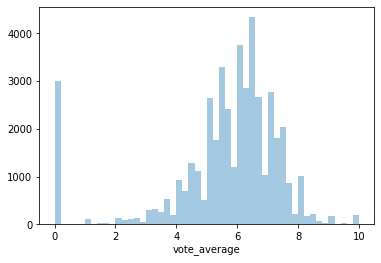

In [31]:
sns.distplot(input_data['vote_average'],kde=False,bins=50)

In [32]:
#Content Based Recommender

In [33]:
linksSmallDataSet = pd.read_csv('links_small.csv')
linksSmallDataSet = linksSmallDataSet[linksSmallDataSet['tmdbId'].notnull()]['tmdbId'].astype('int')

In [34]:
input_data = input_data.drop([19730, 29503, 35587])

In [35]:
input_data['id'] = input_data['id'].astype('int')

In [36]:
smallMovieDataset = input_data[input_data['id'].isin(linksSmallDataSet)]
smallMovieDataset.shape

(9099, 25)

In [37]:
#Description based recommender

In [38]:
smallMovieDataset['tagline'] = smallMovieDataset['tagline'].fillna('')
smallMovieDataset['description'] = smallMovieDataset['overview'] + smallMovieDataset['tagline']
smallMovieDataset['description'] = smallMovieDataset['description'].fillna('')

In [39]:
termfrequency = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfIdfMatrix = termfrequency.fit_transform(smallMovieDataset['description'])

In [40]:
tfIdfMatrix.shape

(9099, 268124)

In [41]:
cosineSimilarity = linear_kernel(tfIdfMatrix, tfIdfMatrix)

In [42]:
cosineSimilarity[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [43]:
smallMovieDataset = smallMovieDataset.reset_index()
movieTitles = smallMovieDataset['title']
movieIndices = pd.Series(smallMovieDataset.index, index=smallMovieDataset['title'])

In [44]:
def getRecommendation(name):
    indx = movieIndices[name]
    similarityScores = list(enumerate(cosineSimilarity[indx]))
    similarityScores = sorted(similarityScores, key=lambda z: z[1], reverse=True)
    similarityScores = similarityScores[1:31]
    movie_Inds = [o[0] for o in similarityScores]
    return movieTitles.iloc[movie_Inds]

In [45]:
getRecommendation('Shanghai Triad').head(20)

6773                                   Lust, Caution
8209                                        Stowaway
692                                    The Godfather
3274                               Empire of the Sun
8387                                      The Family
7416                                    Soul Kitchen
7571                                        Ip Man 2
3669                                      Billy Liar
2072                                            Life
4196                              Johnny Dangerously
985                                        The Sting
1681                               The Addams Family
8527                                 Survival Island
973                           The Godfather: Part II
6528                                    Stormbreaker
8753                                    Wicked Blood
2761                  National Lampoon's Last Resort
2644    Black Tar Heroin: The Dark End of the Street
3101                                Steal This

In [46]:
getRecommendation('Batman Forever').head(20)

7931                      The Dark Knight Rises
2579               Batman: Mask of the Phantasm
6900                            The Dark Knight
6144                              Batman Begins
8165    Batman: The Dark Knight Returns, Part 1
524                                      Batman
1240                             Batman & Robin
1113                             Batman Returns
7565                 Batman: Under the Red Hood
7901                           Batman: Year One
8227    Batman: The Dark Knight Returns, Part 2
681                         Eyes Without a Face
6206                                   Cry_Wolf
1135                   Night Falls on Manhattan
2075                             Open Your Eyes
149                                     Hackers
8917         Batman v Superman: Dawn of Justice
2696                                        JFK
8680                          The Young Savages
7242                  The File on Thelma Jordon
Name: title, dtype: object

In [47]:
#Metadata Based recommender

In [48]:
creditsData = pd.read_csv('credits.csv')
keywordsData = pd.read_csv('keywords.csv')

In [49]:
keywordsData['id'] = keywordsData['id'].astype('int')
creditsData['id'] = creditsData['id'].astype('int')
input_data['id'] = input_data['id'].astype('int')

In [50]:
input_data.shape

(45463, 25)

In [51]:
input_data = input_data.merge(creditsData, on='id')
input_data = input_data.merge(keywordsData, on='id')

In [52]:
smallMovieDataset = input_data[input_data['id'].isin(linksSmallDataSet)]
smallMovieDataset.shape

(9219, 28)

In [53]:
smallMovieDataset['cast'] = smallMovieDataset['cast'].apply(literal_eval)
smallMovieDataset['crew'] = smallMovieDataset['crew'].apply(literal_eval)
smallMovieDataset['keywords'] = smallMovieDataset['keywords'].apply(literal_eval)
smallMovieDataset['cast_size'] = smallMovieDataset['cast'].apply(lambda z: len(z))
smallMovieDataset['crew_size'] = smallMovieDataset['crew'].apply(lambda z: len(z))

In [54]:
def getDirector(z):
    for a in z:
        if a['job'] == 'Director':
            return a['name']
    return np.nan

In [55]:
smallMovieDataset['director'] = smallMovieDataset['crew'].apply(getDirector)

In [56]:
smallMovieDataset['cast'] = smallMovieDataset['cast'].apply(lambda z: [a['name'] for a in z] if isinstance(z, list) else [])
smallMovieDataset['cast'] = smallMovieDataset['cast'].apply(lambda z: z[:3] if len(z) >=3 else z)

In [57]:
smallMovieDataset['keywords'] = smallMovieDataset['keywords'].apply(lambda z: [a['name'] for a in z] if isinstance(z, list) else [])

In [58]:
smallMovieDataset['cast'] = smallMovieDataset['cast'].apply(lambda z: [str.lower(a.replace(" ", "")) for a in z])

In [59]:
smallMovieDataset['director'] = smallMovieDataset['director'].astype('str').apply(lambda z: str.lower(z.replace(" ", "")))
smallMovieDataset['director'] = smallMovieDataset['director'].apply(lambda z: [z,z,z])

In [60]:
abc = smallMovieDataset.apply(lambda z: pd.Series(z['keywords']),axis=1).stack().reset_index(level=1, drop=True)
abc.name = 'keyword'

In [61]:
abc = abc.value_counts()
abc[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

In [62]:
abc = abc[abc > 1]

In [66]:
stemming = SnowballStemmer('english')
stemming.stem('Big Datas')

'big data'

In [67]:
def filterKeywords(a):
    words = []
    for p in a:
        if p in abc:
            words.append(p)
    return words

In [68]:
smallMovieDataset['keywords'] = smallMovieDataset['keywords'].apply(filterKeywords)
smallMovieDataset['keywords'] = smallMovieDataset['keywords'].apply(lambda z: [stemming.stem(q) for q in z])
smallMovieDataset['keywords'] = smallMovieDataset['keywords'].apply(lambda z: [str.lower(q.replace(" ", "")) for q in z])

In [69]:
smallMovieDataset['soup'] = smallMovieDataset['keywords'] + smallMovieDataset['cast'] + smallMovieDataset['director'] + smallMovieDataset['genres']
smallMovieDataset['soup'] = smallMovieDataset['soup'].apply(lambda z: ' '.join(z))

In [70]:
num = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
numMatrix = num.fit_transform(smallMovieDataset['soup'])

In [71]:
cosineSimilarity = cosine_similarity(numMatrix, numMatrix)

In [72]:
smallMovieDataset = smallMovieDataset.reset_index()
movieTitles = smallMovieDataset['title']
movieIndices = pd.Series(smallMovieDataset.index, index=smallMovieDataset['title'])

In [73]:
getRecommendation('Inception').head(5)

6623             The Prestige
3381                  Memento
4145                 Insomnia
2085                Following
8031    The Dark Knight Rises
Name: title, dtype: object

In [74]:
def impRecommendations(name):
    indx = movieIndices[name]
    similarityScores = list(enumerate(cosineSimilarity[indx]))
    similarityScores = sorted(similarityScores, key=lambda z: z[1], reverse=True)
    similarityScores = similarityScores[1:26]
    movie_Inds = [p[0] for p in similarityScores]
    
    movieNames = input_data.iloc[movie_Inds][['title', 'vote_count', 'vote_average', 'year']]
    no_of_votes = movieNames[movieNames['vote_count'].notnull()]['vote_count'].astype('int')
    avgVotes = movieNames[movieNames['vote_average'].notnull()]['vote_average'].astype('int')
    meanVotes = avgVotes.mean()
    minVotes = no_of_votes.quantile(0.60)
    movies_qualified = movieNames[(movieNames['vote_count'] >= minVotes) & (movieNames['vote_count'].notnull()) & (movieNames['vote_average'].notnull())]
    movies_qualified['vote_count'] = movies_qualified['vote_count'].astype('int')
    movies_qualified['vote_average'] = movies_qualified['vote_average'].astype('int')
    movies_qualified['wr'] = movies_qualified.apply(weighted_rating, axis=1)
    movies_qualified = movies_qualified.sort_values('wr', ascending=False).head(10)
    return movies_qualified

In [75]:
impRecommendations('Batman Forever')

,title,vote_count,vote_average,year,wr
2523,The Mummy,2796,6,1999,5.898540
315,Shallow Grave,247,7,1994,5.881476
1260,The Big Sleep,244,7,1946,5.876527
3174,Hard Boiled,169,7,1992,5.736791
6981,Beauty and the Beast,133,7,1946,5.656588
6703,The Rules of the Game,109,7,1939,5.597210
524,Searching for Bobby Fischer,100,7,1993,5.573568
1721,Suicide Kings,86,6,1997,5.369779
2442,Earthquake,76,5,1974,5.208402
6218,Anger Management,937,5,2003,5.077524


In [76]:
#Collaborative Filtering

In [77]:
read = Reader()

In [78]:
movieRatings = pd.read_csv('ratings_small.csv')
movieRatings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [79]:
inputData = Dataset.load_from_df(movieRatings[['userId', 'movieId', 'rating']], read)

In [80]:
singleVD = SVD()
cross_validate(singleVD, inputData, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.89707477, 0.88324853, 0.90921328, 0.89043196, 0.90354828]),
 'test_mae': array([0.69212425, 0.68049989, 0.69980372, 0.68921543, 0.69242386]),
 'fit_time': (5.8468077182769775,
  6.20166802406311,
  5.724970817565918,
  5.793152093887329,
  5.855086088180542),
 'test_time': (0.18041586875915527,
  0.37017107009887695,
  0.1652078628540039,
  0.18491697311401367,
  0.20931696891784668)}

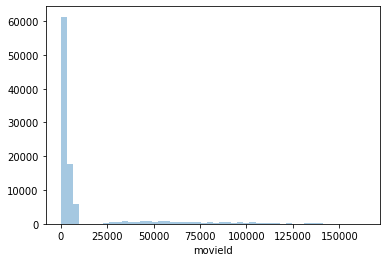

In [81]:
sns.distplot(movieRatings['movieId'],kde=False,bins=50)

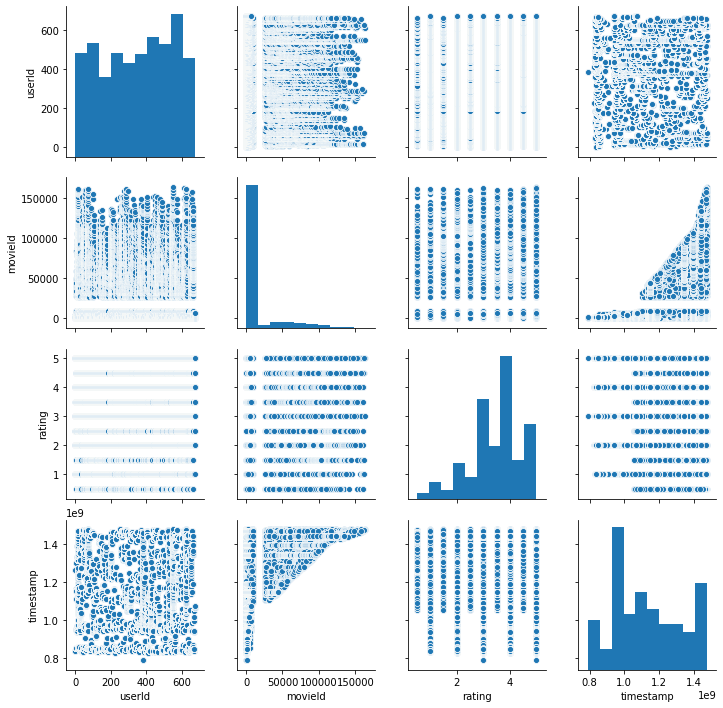

In [82]:
sns.pairplot(movieRatings)

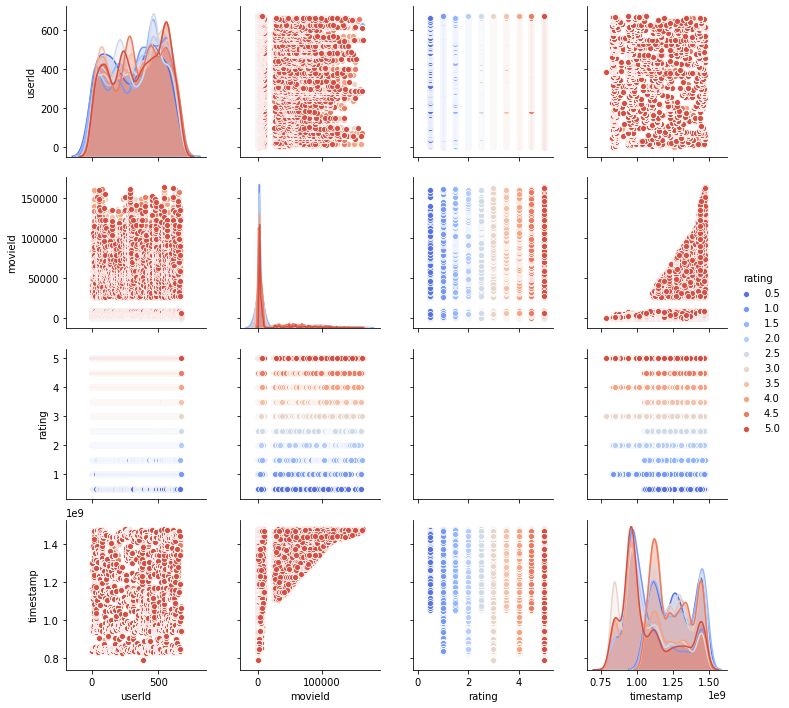

In [83]:
sns.pairplot(movieRatings,hue='rating',palette='coolwarm')

In [84]:
trainsetData = inputData.build_full_trainset()
singleVD.fit(trainsetData)

In [85]:
movieRatings[movieRatings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [86]:
singleVD.predict(1, 300, 5)

Prediction(uid=1, iid=300, r_ui=5, est=3.0034711864442394, details={'was_impossible': False})

In [87]:
#Hybrid

In [88]:
def convertInt(a):
    try:
        return int(a)
    except:
        return np.nan

In [89]:
idMap = pd.read_csv('links_small.csv')[['movieId', 'tmdbId']]
idMap['tmdbId'] = idMap['tmdbId'].apply(convertInt)
idMap.columns = ['movieId', 'id']
idMap = idMap.merge(smallMovieDataset[['title', 'id']], on='id').set_index('title')

In [90]:
indicesMap = idMap.set_index('id')

In [91]:
def hybridRecommendation(usernum, name):
    indx = movieIndices[name]
    tdbId = idMap.loc[name]['id']
    movieId = idMap.loc[name]['movieId']
    
    similarityScores = list(enumerate(cosineSimilarity[int(indx)]))
    similarityScores = sorted(similarityScores, key=lambda d: d[1], reverse=True)
    similarityScores = similarityScores[1:26]
    movie_Inds = [h[0] for h in similarityScores]
    
    movieNames = smallMovieDataset.iloc[movie_Inds][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movieNames['est'] = movieNames['id'].apply(lambda w: singleVD.predict(usernum, indicesMap.loc[w]['movieId']).est)
    movieNames = movieNames.sort_values('est', ascending=False)
    return movieNames.head(10)

In [92]:
hybridRecommendation(1, 'The Terminator')

,title,vote_count,vote_average,year,id,est
7488,Avatar,12114.0,7.2,2009,19995,3.018819
974,Aliens,3282.0,7.7,1986,679,2.981203
522,Terminator 2: Judgment Day,4274.0,7.7,1991,280,2.954099
6967,Doomsday,374.0,5.8,2008,13460,2.927908
6394,District B13,572.0,6.5,2004,10045,2.819424
1376,Titanic,7770.0,7.5,1997,597,2.747625
7403,Gamer,778.0,5.6,2009,18501,2.706491
7502,The Book of Eli,2207.0,6.6,2010,20504,2.694188
5296,Zardoz,106.0,5.8,1974,4923,2.683079
7991,In Time,3512.0,6.7,2011,49530,2.658243


In [93]:
hybridRecommendation(100, 'The Terminator')

,title,vote_count,vote_average,year,id,est
974,Aliens,3282.0,7.7,1986,679,3.899735
7991,In Time,3512.0,6.7,2011,49530,3.727733
7502,The Book of Eli,2207.0,6.6,2010,20504,3.707291
522,Terminator 2: Judgment Day,4274.0,7.7,1991,280,3.657294
922,The Abyss,822.0,7.1,1989,2756,3.618038
6622,Children of Men,2120.0,7.4,2006,9693,3.599097
6394,District B13,572.0,6.5,2004,10045,3.511455
7296,Terminator Salvation,2496.0,5.9,2009,534,3.448091
344,True Lies,1138.0,6.8,1994,36955,3.436736
2412,RoboCop,1494.0,7.1,1987,5548,3.411205


In [94]:
#End